In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("gender_submission.csv")

In [12]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [13]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [15]:
import pandas as pd
import numpy as np

# Generating a sample Titanic dataset
data = {
    'PassengerId': np.arange(1, 891),
    'Survived': np.random.randint(0, 2, size=890),
    'Pclass': np.random.randint(1, 4, size=890),
    'Name': ['Name'] * 890,
    'Sex': np.random.choice(['male', 'female'], size=890),
    'Age': np.random.uniform(1, 80, size=890),
    'SibSp': np.random.randint(0, 6, size=890),
    'Parch': np.random.randint(0, 6, size=890),
    'Ticket': ['Ticket'] * 890,
    'Fare': np.random.uniform(10, 500, size=890),
    'Cabin': [np.nan] * 890,
    'Embarked': np.random.choice(['C', 'Q', 'S'], size=890)
}

# Creating DataFrame
titanic = pd.DataFrame(data)

# Display the first few rows of the dataset
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,2,Name,female,77.456816,3,1,Ticket,330.045135,NaN,C
1,2,0,2,Name,female,28.472123,0,4,Ticket,467.731106,NaN,C
2,3,1,2,Name,male,48.883254,3,1,Ticket,233.835112,NaN,C
3,4,0,1,Name,female,60.871337,5,2,Ticket,111.175405,NaN,S
4,5,1,3,Name,female,20.202925,4,3,Ticket,136.873720,NaN,C


In [16]:
# Display basic information about the dataset
titanic.info()

# Display summary statistics for numerical columns
titanic.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int32  
 1   Survived     890 non-null    int32  
 2   Pclass       890 non-null    int32  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        890 non-null    int32  
 7   Parch        890 non-null    int32  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        0 non-null      float64
 11  Embarked     890 non-null    object 
dtypes: float64(3), int32(5), object(4)
memory usage: 66.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,890.000000,890.000000,890.000000,890,890,890.000000,890.000000,890.000000,890,890.000000,0.0,890
unique,NaN,NaN,NaN,1,2,NaN,NaN,NaN,1,NaN,NaN,3
top,NaN,NaN,NaN,Name,female,NaN,NaN,NaN,Ticket,NaN,NaN,C
freq,NaN,NaN,NaN,890,451,NaN,NaN,NaN,890,NaN,NaN,309
mean,445.500000,0.507865,1.944944,NaN,NaN,41.471068,2.622472,2.429213,NaN,250.393510,NaN,NaN
std,257.065167,0.500219,0.807935,NaN,NaN,23.445198,1.732100,1.728488,NaN,138.300388,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,1.046616,0.000000,0.000000,NaN,11.404462,NaN,NaN
25%,223.250000,0.000000,1.000000,NaN,NaN,20.664924,1.000000,1.000000,NaN,130.890023,NaN,NaN
50%,445.500000,1.000000,2.000000,NaN,NaN,41.740426,3.000000,2.000000,NaN,252.080907,NaN,NaN
75%,667.750000,1.000000,3.000000,NaN,NaN,63.099318,4.000000,4.000000,NaN,364.295185,NaN,NaN


In [17]:
# Fill missing age values with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing embarked values with the most common embarkation point
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
titanic.drop(columns=['Cabin'], inplace=True)

# Drop rows with any remaining missing values
titanic.dropna(inplace=True)

# Verify that there are no more missing values
titanic.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

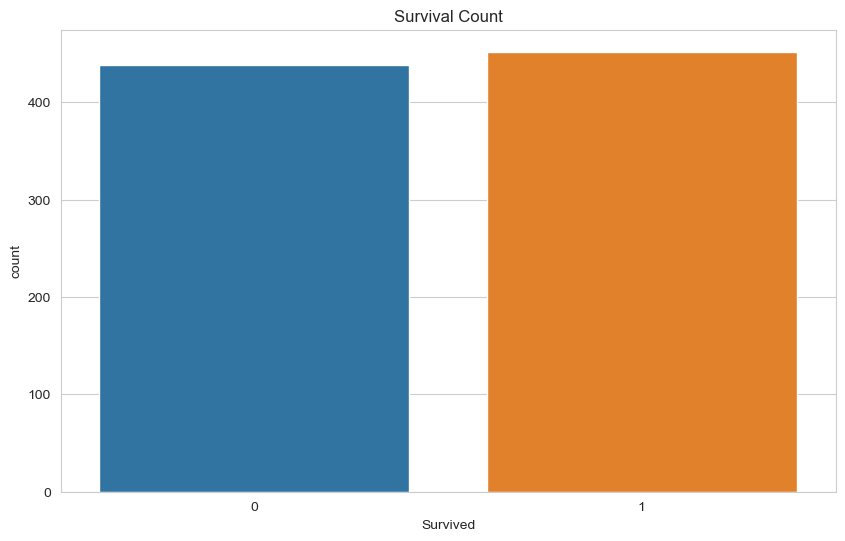

C:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


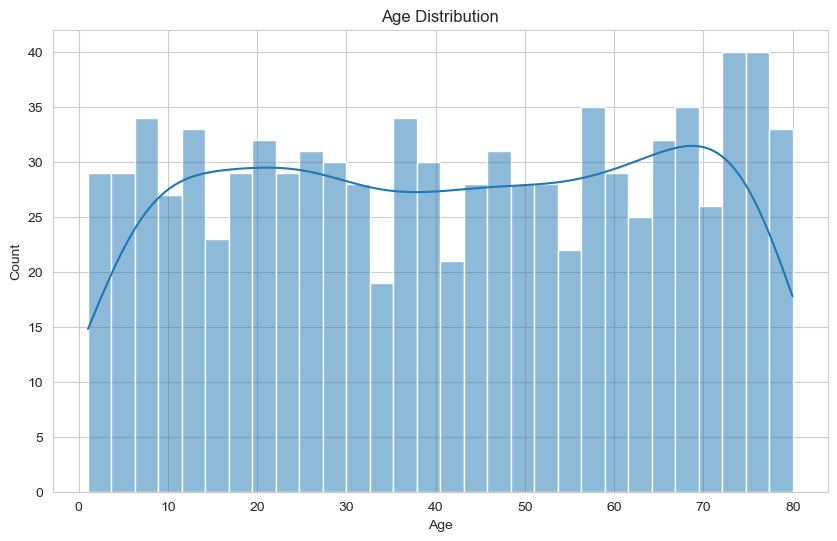

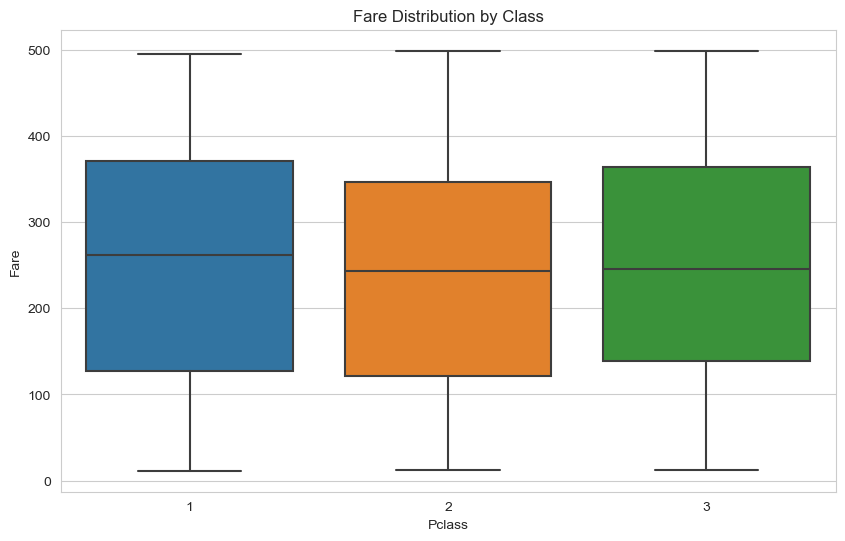

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Count plot for the 'Survived' column
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Survived')
plt.title('Survival Count')
plt.show()

# Histogram for the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Box plot for 'Fare' by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x='Pclass', y='Fare')
plt.title('Fare Distribution by Class')
plt.show()


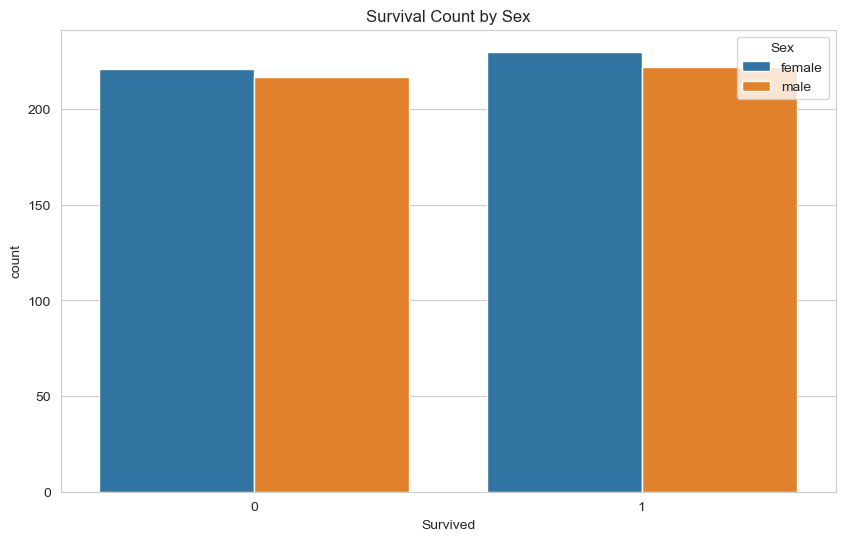

AttributeError: 'numpy.int32' object has no attribute 'startswith'

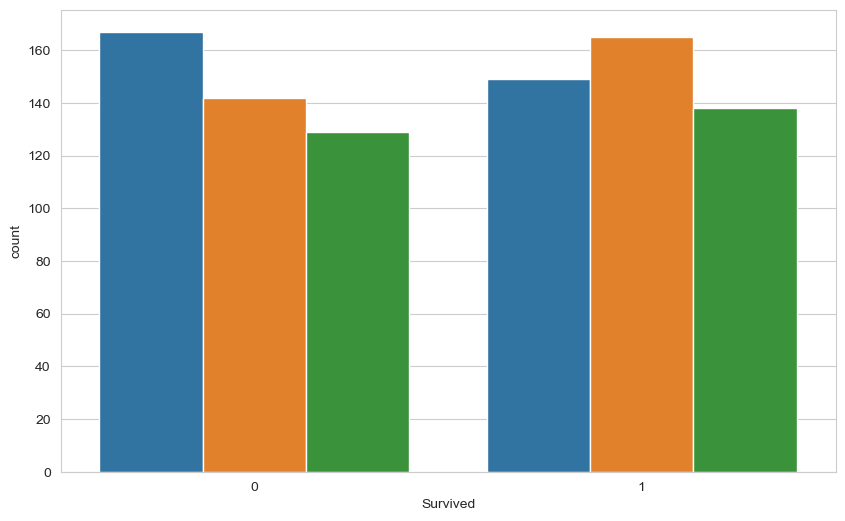

In [19]:
# Count plot for 'Survived' by 'Sex'
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Survived', hue='Sex')
plt.title('Survival Count by Sex')
plt.show()

# Count plot for 'Survived' by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Survived', hue='Pclass')
plt.title('Survival Count by Class')
plt.show()

# Pair plot to see relationships between features
sns.pairplot(titanic, hue='Survived')
plt.show()


Survived         0    1  All
Pclass Sex                  
1      female   92   72  164
       male     75   77  152
2      female   72   88  160
       male     70   77  147
3      female   57   70  127
       male     72   68  140
All            438  452  890


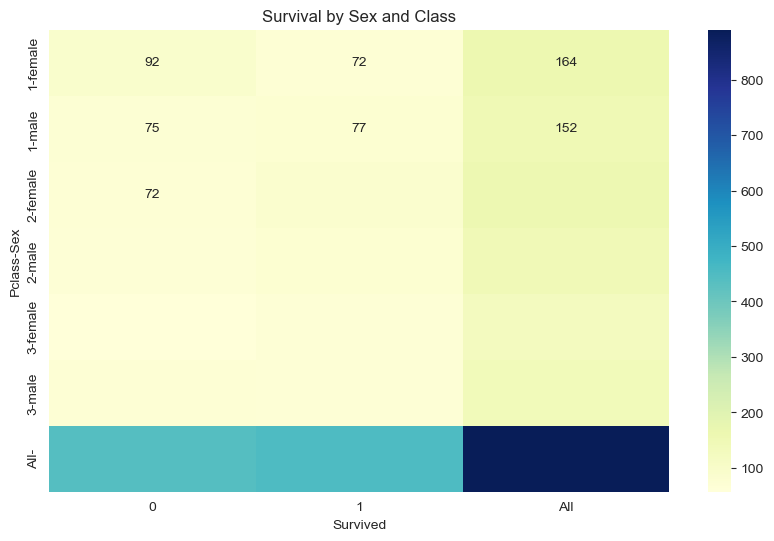

In [20]:
# Crosstab for survival by sex and class
survival_sex_class = pd.crosstab(index=[titanic['Pclass'], titanic['Sex']], columns=titanic['Survived'], margins=True)
print(survival_sex_class)

# Heatmap for survival by sex and class
plt.figure(figsize=(10, 6))
sns.heatmap(survival_sex_class, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival by Sex and Class')
plt.show()
